# Semantic NLP 

## Lexical Semantics

Definition:
Study of word meanings and relations among words — how words convey meaning individually and in combination.

Key Concepts:
- **Synonyms** share similar meanings but may differ in tone or style (big vs large, begin vs commence). 
- **Antonyms** can be gradable (hot vs cold), complementary (alive vs dead) or relational (teacher vs student). 
- **Polysemy** covers words with related senses, such as paper (material vs article).  
- **Homonyms** are words that share the same form but have completely unrelated meanings. They can appear in these two ways: 
    - **Homophones**, which sound the same but differ in spelling and meaning, such as flower and flour 
    - **Homographs**, which are spelt the same but carry different meanings, and, sometimes, even different pronunciations, such as lead (to guide) and lead (the metal). 
- **Hypernyms** and **hyponyms** describe category relationships. 
    - **hypernym** is a broad category word such as animal, 
    - **hyponym** is a more specific member of that category, such as dog. You can think of this as an 'is-a-kind-of' relationship: a dog is a kind of animal. 
- **Holonyms** and **meronyms** capture part–whole relations. 
    - **holonym** is the whole, such as tree, 
    - **meronym** is a part of that whole, such as branch or leaf. 

Applications:
- Word sense disambiguation
- Information retrieval
- Semantic search

| Concept         | Description                             | Example                              |
| --------------- | --------------------------------------- | ------------------------------------ |
| **Synonymy**    | Words with similar meanings             | *big* ↔ *large*                      |
| **Antonymy**    | Words with opposite meanings            | *hot* ↔ *cold*                       |
| **Polysemy**    | One word with multiple related meanings | *bank* (river bank / financial bank) |
| **Homonymy**    | One word with unrelated meanings        | *bat* (animal / sports equipment)    |
| **Hyponymy**    | “Is-a” relationship                     | *rose* is a *flower*                 |
| **Meronymy**    | “Part-of” relationship                  | *wheel* is part of *car*             |
| **Hypernymy**   | More general term                       | *vehicle* is a hypernym of *car*     |
| **Collocation** | Words that co-occur naturally           | *make a decision*, *fast food*       |

**Remember:**

“Lexical semantics is about relationships between words and structure of meaning.”

💡 Mnemonic: SAPH HMHC
Synonymy – Antonymy – Polysemy – Homonymy – Hyponymy – Meronymy – Hypernymy  – Collocation.

**Example:**

Sentence: “The dog chased the cat.”
- dog → agent (animate noun)
- chased → action (verb)
- cat → patient (object acted upon)

Lexical semantics helps us interpret meaning roles of each word type.

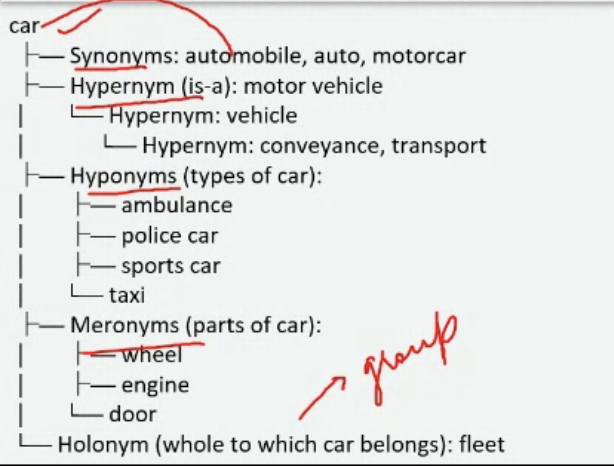

---
---

## Word Sense Disambiguation (WSD)

### What is WSD (short)

WSD = choose the correct meaning (sense) of an ambiguous word from multiple candidate senses, using the surrounding context.

### 1. Lesk algorithm (classic gloss-overlap method)

✳️ **Core idea**

Compare the dictionary gloss (definition + example words) of each candidate sense with the words appearing in the context window around the target word. The sense whose gloss shares the most overlapping words with the context wins.

🔁 **Simple Lesk (steps)**

- Pick target word w in sentence.
- Collect context words: maybe the whole sentence or ±N words.
- For each candidate sense s of w:
    - Get gloss(s) (definition + example usage).
    - Optionally expand gloss with related glosses (see extended Lesk).
    - Compute overlap = count of common words between gloss(s) and context.
- Choose sense with highest overlap (tie-breaker: frequency or first sense).

📌 **Pseudocode (concise)**

```
context = set(words_around(w))
best_sense = None
best_score = 0
for s in senses(w):
    gloss_words = set(tokenize(gloss(s)))
    score = |context ∩ gloss_words|
    if score > best_score:
        best_score = score; best_sense = s
return best_sense
```

✅ **Worked example (your sentence)**

Sentence: “The workers cleaned the plant after the shift.”
- Target: plant (senses: living organism vs factory)
- Context words: {workers, cleaned, after, shift}
- Gloss(living-plant): {plant, living, green, leaf, stem, grow, ...} → overlaps: {plant? maybe none with context}
- Gloss(factory-plant): {factory, plant, industrial, factory-floor, workers, shift, machinery, ...} → overlaps: {workers, shift, cleaned? (maybe machinery/cleaned)} → higher overlap → choose factory.

➕ **Advantages of Lesk**

- Simple, intuitive.
- No labeled training data needed.
- Interpretable (you can eyeball overlaps).

➖ **Limitations**

- Depends on quality & wording of glosses — sparse overlaps when gloss wording differs from context.
- Sensitive to stopwords/tokenization choices.
- Poor when context uses synonyms not present in gloss.
- Basic Lesk ignores deeper semantic links.

### Improved / Extended Lesk & practical variants

|                    Variant | What it changes                                                                        | Why helpful                                              |
| -------------------------: | -------------------------------------------------------------------------------------- | -------------------------------------------------------- |
|          **Extended Lesk** | Expand gloss with glosses of related synsets (hypernyms, hyponyms, meronyms, examples) | More overlap opportunities; captures broader relatedness |
|      **Context expansion** | Use larger context (sentence, paragraph) or incorporate collocations                   | Better signal when sentence is short                     |
|       **Weighted overlap** | Weight rare words / longer overlaps more (e.g., n-gram overlaps score higher)          | Penalizes common words; rewards strong matches           |
| **Lesk with POS matching** | Match POS-tagged words only (noun senses matched to nouns)                             | Reduces spurious matches                                 |


---

## 2. Knowledge-based WSD (WordNet, ConceptNet, graph approaches)

✳️ **Core idea**

Use lexical/semantic networks (WordNet, ConceptNet) to compute semantic relatedness between context words and candidate senses. Rather than simple gloss matching, measure distance or relatedness in a graph of concepts.

🔹 **Common knowledge-based techniques**

- **Path length / shortest path** between candidate synset and synsets of context words (shorter = more related).
- **Information content (IC) methods** (Resnik, Lin, Jiang-Conrath) — combine corpus-based informativeness with taxonomy structure.
- **Lesk on expanded glosses** — gloss overlap but include related synsets’ glosses (a hybrid).
- **Graph-based centrality / PageRank**: build subgraph around context and rank senses by connectivity.

**Use of ConceptNet**: match commonsense relations (UsedFor, AtLocation) against context cues.

🔁 **Typical pipeline (WordNet path approach)**
```
For each context word (cw), get candidate synsets S_cw.
For each sense candidate s of the target:
    - Compute similarity(s, S_cw) for all cw (e.g., shortest path length or IC-based score).
    - Aggregate similarity scores across cw (sum/avg).
- Pick sense s with highest aggregated relatedness.
```

✳️ **Example:** 

“I sat on the bank and watched the river flow.”
- Target: bank
- Context synsets: {sit→action, river→river.n.01, flow→move.v.01}

- bank senses:
    - bank.n.01 = financial institution (hypernyms: institution)
    - bank.n.02 = river bank (hypernyms: shore)

- Path similarity between bank.n.02 and river synset will be short; bank.n.01 will be far → choose river bank.

➕ **Advantages**
    - Leverages rich lexical relations (is-a, part-of, etc.).
    - Works better when glosses alone don’t overlap.
    - Does not require annotated corpora.

➖ **Limitations**
    - Requires a good lexical graph (WordNet coverage varies by domain/language).
    - Some measures need corpus-based IC values (requires corpora). 
    - Computationally heavier (graph traversals, similarity computations).

---

### Comparison: Lesk vs Knowledge-based (table) WSD

| Aspect         |                    Lesk (gloss overlap) | Knowledge-based (graph/WordNet)                         |
| -------------- | --------------------------------------: | ------------------------------------------------------- |
| Data needed    |                 Dictionary/glosses only | Lexical network (WordNet/ConceptNet) ± corpora for IC   |
| Core operation |                          Count overlaps | Compute semantic relatedness / path distance            |
| Strengths      |      Simple, interpretable, no training | Uses rich relations; handles indirect relatedness       |
| Weaknesses     | Weak when gloss/context wording differs | Needs good lexical resource; heavier compute            |
| Best when      |    Gloss wording contains context words | Context words relate indirectly via hypernyms/relations |


### Practical tips & engineering signals

- Preprocess: normalize tokens, remove stopwords carefully (keep content words), POS-tag context so you compare nouns-to-nouns, verbs-to-verbs.

- Context window: use sentence ± neighboring sentence for short texts (tweets), whole paragraph for long texts.

- Combine signals: hybridize Lesk + path similarity + distributional similarity (embeddings) for best results.

- Use frequency as tie-breaker: if two senses score equally, prefer more frequent sense (first sense heuristic).

- Domain adaptation: WordNet may miss domain senses; consider domain-specific ontologies or embeddings.

### Hybrid & modern enhancements (brief)

- Gloss + embeddings: embed glosses and context with sentence embeddings; pick sense whose gloss embedding is closest to context embedding.

- Graph + PageRank: build graph of candidate senses + context words and run PageRank; top-ranked sense selected.

- Use pretrained contextual models (BERT): fine-tune classifiers or use sense inventories mapped to contextual embeddings (state-of-the-art WSD uses supervised neural models trained on SemCor, but you asked for knowledge-based).

### Quick reference

| Item                      | What to do                                             | Why / Note                          |
| ------------------------- | ------------------------------------------------------ | ----------------------------------- |
| Lesk basic                | Count overlaps between gloss and context               | Very simple; no corpus needed       |
| Lesk extended             | Add related glosses (hypernyms, examples)              | Reduce sparse-overlap problem       |
| Path similarity           | Shortest path in WordNet between s and context synsets | Good for taxonomy-based relatedness |
| IC-based (Resnik/Lin/JCN) | Use corpus-derived IC + taxonomy                       | More principled similarity measure  |
| Graph methods             | Build subgraph, rank by centrality                     | Captures multi-hop relations        |
| Hybrid                    | Combine Lesk + WordNet + embeddings                    | Most robust in practice             |


### Two worked examples side-by-side
- Example A — Your sentence (industrial)
    - Sentence: “The workers cleaned the plant after the shift.”
    - Lesk: overlaps with gloss(factory) → choose factory.  
    - WordNet path: context words (workers, shift, cleaned) map to synsets related to industry/work → shorter path to factory sense → factory.

- Example B — Ambiguous “bank”
    - Sentence 1: “She deposited money at the bank.” → money → strong relation to financial institution → choose financial bank.
    - Sentence 2: “He sat on the bank and fished.” → fished, river → relation to river → choose river bank.

### Memory aids

- Lesk = Look for Overlap in the Gloss (L-O-G)
- Knowledge-based = WALK the graph (WordNet) and see which sense is closest
- Hybrid rule: If gloss overlap strong → Lesk wins; if overlap weak → use WordNet path/IC; else use embeddings.

---
---

## Distributional Semantics

Distributional semantics, learns meaning from raw usage patterns in large text corpora.

🧩 **1. What is Distributional Semantics?**

| Concept                                   | Meaning                                                                                                             | Analogy / Memory cue                                                       |
| ----------------------------------------- | ------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| **Goal**                                  | Represent *meaning* of words based on the *contexts they appear in*                                                 | “You shall know a word by the company it keeps.”                           |
| **Core idea (Distributional Hypothesis)** | Words that occur in similar contexts tend to have similar meanings.                                                 | *dog* and *cat* both appear near “pet”, “fur”, “animal” → similar meanings |
| **Approach type**                         | **Data-driven**, learned directly from text (unlike WordNet-based).                                                 | Think: learn from usage, not dictionaries                                  |
| **Output**                                | A vector representation for each word showing its association strengths with other words (its *context signature*). | “word-as-vector”                                                           |


🧮 **2. Building a Co-occurrence Matrix**
| Step                        | What it does                                                              | Example                                        |
| --------------------------- | ------------------------------------------------------------------------- | ---------------------------------------------- |
| **1. Collect corpus**       | Get a text sample: e.g. “The cat sat on the mat. The dog sat on the rug.” | small toy corpus                               |
| **2. Define window size**   | Number of context words to consider around target word (±2 typical).      | For “sat”, window words = {the, cat, on, the}  |
| **3. Count co-occurrences** | Count how often each (target, context) pair appears.                      | (cat, mat)=1, (dog, rug)=1, (sat, cat)=1, etc. |
| **4. Form matrix**          | Rows = target words, Columns = context words, Cells = counts.             | see below                                      |

Example co-occurrence matrix

| Word ↓ \ Context → | cat | dog | sat | mat | rug | the |
| ------------------ | --: | --: | --: | --: | --: | --: |
| cat                |   0 |   0 |   1 |   1 |   0 |   2 |
| dog                |   0 |   0 |   1 |   0 |   1 |   2 |
| sat                |   1 |   1 |   0 |   1 |   1 |   2 |

(Co-occurrence window = ±2 words)

👉 These raw counts show patterns, but frequent function words (“the”) dominate.




⚙️ 3. **From Counts to Probabilities**

We convert raw counts into probabilities to reason about how expected a co-occurrence is.

P(w,c)= count(w, c) / total pairscount

Where,
- P(w) = count(w) / total pairs
- P(c) = count(c) / total pairs

💡 **4. Pointwise Mutual Information (PMI)**

​PMI(w,c) = log2 [​P(w)P(c) / P(w,c)]

| Concept            | Formula                                                                 | Intuition                                                    | Example                                                                      |
| ------------------ | ----------------------------------------------------------------------- | ------------------------------------------------------------ | ---------------------------------------------------------------------------- |
| **PMI**            | PMI(w, c) = log2 = P(w, c) / P(w)P(c)                          | Compares *actual* co-occurrence vs *expected* if independent | If “dog” & “bark” appear together far more often than random chance, PMI > 0 |
| **Interpretation** | High PMI → strong semantic link, Low/Negative → weak/unrelated          | PMI(cat, meow) > PMI(cat, table)                             |                                                                              |
| **Why needed**     | Corrects bias of frequent but meaningless words like “the”, “is”, “and” | Filters out noise from function words                        |                                                                              |

🧭 **5. Positive PMI (PPMI)**
| Concept    | Definition                                                                       | Effect                                                   |
| ---------- | -------------------------------------------------------------------------------- | -------------------------------------------------------- |
| **PPMI**   | ( PPMI(w, c) = max(PMI(w, c), 0) )                                              | Keeps only positive associations; sets negatives to zero |
| **Why**    | Negative PMI indicates “less likely than random”, usually not useful for meaning |                                                          |
| **Result** | Sparse but more meaningful matrix, highlighting genuine associations             |                                                          |

🧩 **6. Example PMI Computation (Toy numbers)**

Suppose: 
- P(cat) = 0.10, P(mat) = 0.08, P(cat, mat) = 0.05
    - PMI(cat,mat)=log2 [ 0.05 / (0.10 * 0.08) ] = 2.64
    - → Strong association (since “cat” and “mat” co-occur much more often than random chance).

- If P(cat, the) = 0.07,
    - PMI(cat,the)=log2 [0.07 / (0.10 * 0.15)] = 2.22
    - → Still positive, but usually downweighted by stopword removal.

    

🧮 **7. Turning Co-occurrences into Vectors**

- Matrix as vectors: 
    - Each row (word) = vector of co-occurrence or PMI values with contexts: 
    - “cat” = [0.5 with ‘dog’, 2.6 with ‘mat’, …]
- Similarity measure:
    - Compute cosine similarity between vectors
    - cos(theta) = A.B / |A| |B|
- Meaning :
    - Small angle (high cosine) → words used in similar contexts → similar meaning
    - “cat” ~ “dog”; “car” ~ “vehicle”

| Symbol      | Meaning                                                     |
| ----------- | ----------------------------------------------------------- |
| (A, B)      | The two word vectors (e.g., word embeddings or PMI vectors) |
| (A dot B) | Dot product of the two vectors = (sum_i [A_i * B_i])    |
| (magnitude A)       | Magnitude (length) of vector (A = sqrt{sum_i [A_i^2]})      |
| (magnitude B)       | Magnitude (length) of vector (B = sqrt{sum_i [B_i^2]})      |


🧠 **8. Limitations and fixes**
| Issue                              | Description                                 | Solution                                                       |
| ---------------------------------- | ------------------------------------------- | -------------------------------------------------------------- |
| **High dimensionality & sparsity** | Huge matrices, most entries zero            | Dimensionality reduction (SVD, PCA) → Latent Semantic Analysis |
| **Frequency bias**                 | Common words dominate                       | PMI / PPMI normalization                                       |
| **Context window too small/large** | Too small = noisy; too large = generic      | Tune based on corpus size/task                                 |
| **Static meaning**                 | Each word has one vector (ignores polysemy) | Contextual embeddings (Word2Vec, GloVe, BERT) solve this later |


---

🧾 **9. Comparison table — Count-based vs. Predictive models**

| Type            | Example                                                           | Core idea                                       | Representation                |
| --------------- | ----------------------------------------------------------------- | ----------------------------------------------- | ----------------------------- |
| **Count-based** | Co-occurrence, PMI, LSA                                           | Compute from word-context counts                | Explicit matrix (PPMI values) |
| **Predictive**  | Word2Vec, GloVe                                                   | Train model to predict context (Skip-gram/CBOW) | Learned dense embeddings      |
| **Link**        | GloVe bridges the two — it factorizes PMI-like co-occurrence info | Combines count-based & predictive strengths     |                               |


🌐 **10. Quick memory map**

| Concept                      | Keyword                  | Mnemonic                                 |
| ---------------------------- | ------------------------ | ---------------------------------------- |
| **Distributional semantics** | Meaning = usage          | *“A word by the company it keeps”*       |
| **Co-occurrence matrix**     | Count neighbors          | *Frequency fingerprint*                  |
| **PMI**                      | Surprise ratio           | *How much more together than by chance?* |
| **PPMI**                     | Filter negatives         | *Keep only meaningful pairs*             |
| **Cosine similarity**        | Compare word vectors     | *Angle between meanings*                 |
| **Limitations**              | Sparsity, frequency bias | *Solved by embeddings (Word2Vec/GloVe)*  |


🧠 11. **Example summary**

| Sentence                  | Co-occurrence | PMI focus          | Insight            |
| ------------------------- | ------------- | ------------------ | ------------------ |
| “The cat sat on the mat.” | (cat, mat)=1  | High PMI(cat, mat) | Real association   |
| “The dog sat on the rug.” | (dog, rug)=1  | High PMI(dog, rug) | Real association   |
| “The cat sat the dog.”    | (cat, dog)=1  | Low PMI(cat, dog)  | Weak, coincidental |

Thus, PMI filters meaningful relationships (“cat–mat”, “dog–rug”) from coincidental ones.

---
---

🧠 **Comparison Table: Lesk vs Knowledge-Based vs Distributional Approaches**

| **Aspect**                 | **Lesk Algorithm**                                                                                     | **Knowledge-Based WSD**                                                                                | **Distributional / Embedding-Based WSD**                                                            |
| -------------------------- | ------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------- |
| **Core Idea**              | Disambiguate by comparing **dictionary gloss overlaps** with context words. Lesk algorithm                             | Use **semantic networks** (like WordNet/ConceptNet) to measure **semantic relatedness** between senses. Path Similarity, WU Palmer | Learns meaning directly from how words are used together in real text. Use **statistical co-occurrence** or **contextual embeddings** to infer meaning from usage patterns. Co-occurrrance matrix, PMI, PPMI, cosine similarity |
| **Knowledge Source**       | Dictionary definitions (e.g., WordNet glosses)                                                         | Structured lexical databases (WordNet, ConceptNet, BabelNet)                                           | Large unlabeled text corpora (Wikipedia, Common Crawl, etc.)                                        |
| **Representation**         | Words represented by **gloss text**                                                                    | Words represented by **synsets** (concept nodes linked semantically)                                   | Words represented as **vectors or embeddings** in continuous space                                  |
| **Similarity Measure**     | **Gloss overlap count** (number of shared words between gloss and context)                             | **Semantic similarity** based on **path length**, **depth**, or **information content** in the network | **Cosine similarity** or **contextual distance** between embeddings                                 |
| **Example**                | “Plant” in *‘cleaned the plant after the shift’* → gloss of “factory” overlaps with “workers”, “shift” | “Plant” → sense connected to “factory” synset through *workplace, building* relations                  | “Plant” vector near “factory” embeddings in context; transformer model infers correct sense         |
| **Interpretability**       | Very interpretable (you can read the gloss and overlap)                                                | Interpretable (semantic links visible)                                                                 | Less interpretable (latent vectors encode meaning implicitly)                                       |
| **Data Requirement**       | None — uses only dictionary text                                                                       | No training data — relies on existing lexical networks                                                 | Requires large corpora to train embeddings (Word2Vec, BERT, etc.)                                   |
| **Context Handling**       | Local context only (sentence-level overlap)                                                            | Broader lexical context via semantic relations                                                         | Deep contextual understanding via surrounding words and sentence structure                          |
| **Strengths**              | Simple, unsupervised, transparent                                                                      | Rich semantic relations, captures hierarchy and commonsense                                            | Captures nuanced, dynamic meaning shifts from real usage; scalable                                  |
| **Weaknesses**             | Relies heavily on gloss wording; fails if glosses don’t overlap                                        | Limited to predefined senses; struggles with unseen words                                              | Requires massive data; less explainable; may lose fine-grained sense distinctions                   |
| **Typical Tools / Models** | WordNet (glosses), dictionary APIs                                                                     | WordNet, ConceptNet, BabelNet                                                                          | Word2Vec, GloVe, BERT, ELMo, RoBERTa                                                                |
| **Use Case Example**       | Rule-based NLP or educational applications                                                             | Semantic search, ontology-based reasoning                                                              | Modern NLP tasks (chatbots, QA, MT) with contextual embeddings                                      |


### visual, intuitive “decision flow” comparison of how each method (Lesk, Knowledge-Based, Distributional) figures out what a word means in context — step by step.

Sentence: “The workers cleaned the plant after the shift.”

#### 🧭 1️⃣ Lesk Algorithm (Dictionary Overlap Method)

| **Step**                                              | **What Happens**                                                                               | **Example / Visualization**                  |
| ----------------------------------------------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------- |
| **1.** Identify ambiguous word                        | `plant`                                                                                        | –                                            |
| **2.** Fetch all its dictionary definitions (glosses) | *plant₁*: “a living organism”  <br>*plant₂*: “an industrial building where goods are made”     | 📘 From dictionary                           |
| **3.** Look at *context words*                        | {workers, cleaned, shift}                                                                      | 🧑‍🏭🧹⏰                                     |
| **4.** Compare overlap between gloss and context      | Gloss₂ (“industrial building”) shares terms like *work*, *produce*, *factory* → higher overlap | 🔍 “Shift” and “workers” match factory sense |
| **5.** Choose sense with max overlap                  | ✅ *plant₂ = factory*                                                                           | ✅ Simple, intuitive                          |


🧩 How it thinks: “Which dictionary definition uses similar words as the sentence?”

#### 🌐 2️⃣ Knowledge-Based WSD (Using WordNet / ConceptNet)

| **Step**                                                | **What Happens**                                                                                  | **Example / Visualization**                |
| ------------------------------------------------------- | ------------------------------------------------------------------------------------------------- | ------------------------------------------ |
| **1.** Identify ambiguous word                          | `plant`                                                                                           | –                                          |
| **2.** Fetch its *synsets* (sense nodes) from WordNet   | *plant₁* → living organism<br>*plant₂* → factory                                                  | 🌱 🏭                                      |
| **3.** Build small *semantic network* for context words | “worker” → *person employed in industry*<br>“shift” → *period of work in factory*                 | 🔗 “worker” ↔ “factory” ↔ “shift”          |
| **4.** Measure semantic distance between senses         | *plant₂ (factory)* is more closely linked to *worker* and *shift* in network than *plant₁ (tree)* | 🕸️ Shorter path in network                |
| **5.** Choose most semantically connected sense         | ✅ *plant₂ = factory*                                                                              | ✅ Supported by real-world conceptual links |

🧩 How it thinks: “Which sense is better connected in the semantic network of meanings?”

#### 📊 3️⃣ Distributional Semantics (Context = Meaning)

| **Step**                                                                                      | **What Happens**                                                        | **Example / Visualization**           |
| --------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------- | ------------------------------------- |
| **1.** Collect a huge text corpus                                                             | millions of sentences                                                   | 🗃️                                   |
| **2.** Build a **co-occurrence matrix** (how often words appear near each other)              | “plant” often near {factory, worker, shift}, rarely near {forest, soil} | 🔢 Table of counts                    |
| **3.** Convert counts → **associations** using PMI / PPMI                                     | Filters out frequent but uninformative words like *the*, *and*          | 🎯 Keeps only meaningful pairs        |
| **4.** Compare word-context vectors (e.g., “plant” vs. “factory”) using **cosine similarity** | High similarity → same sense (factory); low → unrelated (tree)          | 📐 Measures closeness in vector space |
| **5.** Choose meaning based on strongest statistical association                              | ✅ *plant₂ = factory*                                                    | ✅ Learned from data patterns          |

🧩 How it thinks: “Which meaning of the word appears in similar contexts across real-world text?”

---
---

## 🧩 Semantic Role Labeling (SRL)

💡 Definition

SRL identifies the semantic roles (meanings or functions) that words or phrases play in a sentence — like Agent, Patient, Instrument, Location, Time, etc.

In short:
- Syntax tells you how words are arranged.
- SRL tells you who does what to whom and when.

🧠 1️⃣ Example to Grasp the Core

Sentence: “The chef cooked the meal with care in the kitchen.”

| **Word/Phrase** | **Role**            | **Explanation**            |
| --------------- | ------------------- | -------------------------- |
| The chef        | **Agent**           | The doer of the action     |
| cooked          | **Predicate**       | The main verb / action     |
| the meal        | **Patient / Theme** | The thing being acted upon |
| with care       | **Manner**          | How the action was done    |
| in the kitchen  | **Location**        | Where the action happened  |

✅ SRL Output:

[Agent: The chef] [Predicate: cooked] [Patient: the meal] [Manner: with care] [Location: in the kitchen]


### 🧩 2️⃣ How SRL Works (Step-by-Step Pipeline)

| **Step**                        | **Task**                           | **Output Example**                        |
| ------------------------------- | ---------------------------------- | ----------------------------------------- |
| 1. **Sentence Input**           | Raw text                           | “The chef cooked the meal with care.”     |
| 2. **Syntactic Parsing**        | Find subject–verb–object structure | `chef → cooked → meal`                    |
| 3. **Predicate Identification** | Find the main verbs                | `cooked`                                  |
| 4. **Argument Detection**       | Identify related noun phrases      | `chef`, `meal`, `care`                    |
| 5. **Role Classification**      | Assign semantic roles              | Agent = chef, Theme = meal, Manner = care |


### ⚙️ 3️⃣ SRL vs Syntax — The Key Difference

| **Aspect**        | **Syntactic Parsing**             | **Semantic Role Labeling (SRL)**                    |
| ----------------- | --------------------------------- | --------------------------------------------------- |
| Focus             | Grammatical structure             | Meaning-based structure                             |
| Question answered | “Which noun modifies which verb?” | “Who did what to whom, how, where?”                 |
| Example output    | Subject → Verb → Object           | Agent → Predicate → Patient                         |
| Example sentence  | `chef → cooked → meal`            | `[Agent: chef] [Predicate: cooked] [Patient: meal]` |


### 🧩 4️⃣ Common Semantic Roles

| **Role**            | **Meaning**          | **Example**                   |
| ------------------- | -------------------- | ----------------------------- |
| **Agent**           | Doer of action       | “*The boy* kicked the ball.”  |
| **Patient / Theme** | Receiver of action   | “The boy kicked *the ball*.”  |
| **Instrument**      | Tool used            | “He cut it *with a knife*.”   |
| **Experiencer**     | Feeler of emotion    | “*She* loved the story.”      |
| **Beneficiary**     | Person benefited     | “He cooked *for his friend*.” |
| **Location**        | Place of action      | “He slept *on the couch*.”    |
| **Manner**          | Way action performed | “He spoke *softly*.”          |
| **Time**            | When action occurred | “He arrived *at noon*.”       |


### 🧮 5️⃣ Under the Hood (Model Types)

| **Approach**                          | **Description**                        | **Pros**                    | **Cons**                         |
| ------------------------------------- | -------------------------------------- | --------------------------- | -------------------------------- |
| **Rule-Based SRL**                    | Uses handcrafted grammar & parse trees | Interpretable               | Not scalable                     |
| **Feature-Based ML** (e.g., CRF, SVM) | Uses syntactic + lexical features      | Accurate with rich features | Needs manual feature engineering |
| **Deep Learning SRL** (BiLSTM, BERT)  | Learns context and role automatically  | High accuracy               | Black-box, data-hungry           |

🧩 Modern SRL uses pre-trained language models like BERT to predict roles directly from context without explicit parse trees.

### 🎓 7️⃣ SRL vs Related Concepts

| **Concept**                | **Goal**                             | **Example**                   |
| -------------------------- | ------------------------------------ | ----------------------------- |
| **NER**                    | Label *entities* (Person, Org, etc.) | “Mary” → PERSON               |
| **Dependency Parsing**     | Show syntactic relations             | `gave → object → book`        |
| **SRL**                    | Show *semantic roles* (who did what) | `[Agent: Mary] [Theme: book]` |
| **Coreference Resolution** | Link mentions of same entity         | “Mary” = “She”                |


### 🧠 Summary Table

| **Aspect**           | **SRL Essence**                                                     |
| -------------------- | ------------------------------------------------------------------- |
| **Purpose**          | Assign roles like Agent, Patient, Instrument to sentence components |
| **Input Needed**     | POS tags + syntactic parse                                          |
| **Output**           | Predicate–argument structure                                        |
| **Example Toolkits** | AllenNLP, SpaCy + PropBank model, HuggingFace SRL models            |
| **Practical Uses**   | Information extraction, question answering, summarization           |

✅ Final SRL Summary:

→ Mary (Agent) gave (Predicate) a book (Theme) to John (Recipient) yesterday (Time).

---
---

## 💫 Named Entity Recognition (NER) + IOB Labelling.

### 🧩 1️⃣ What is NER?

| **Aspect**        | **Description**                                                                                                                                                                                   |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**    | Named Entity Recognition (NER) is the process of identifying and classifying *named entities* in text into predefined categories such as **Person, Organisation, Location, Date, Quantity, etc.** |
| **Goal**          | To find spans of text that refer to real-world entities and label them correctly.                                                                                                                 |
| **Example Input** | “Barack Obama visited Berlin in July 2008.”                                                                                                                                                       |
| **Output**        | `[Barack Obama] → PERSON`, `[Berlin] → LOCATION`, `[July 2008] → DATE`                                                                                                                            |


### 🧭 2️⃣ Why NER Matters

| **Application**            | **Use Case**                                                                          |
| -------------------------- | ------------------------------------------------------------------------------------- |
| **Search engines**         | Identify entities in queries to improve results (“Apple headquarters” → organisation) |
| **Information extraction** | Extract facts: *[Person]* works at *[Organisation]*                                   |
| **Question answering**     | Identify “Who”, “Where”, “When” answers                                               |
| **Summarisation**          | Highlight key entities in text                                                        |
| **Financial / Legal text** | Recognise companies, dates, monetary values                                           |


### 🔖 3️⃣ Core Entity Types (Common Categories)

| **Entity Type**            | **Example**               |
| -------------------------- | ------------------------- |
| PERSON                     | Barack Obama, Marie Curie |
| LOCATION                   | Berlin, Mount Everest     |
| ORGANISATION               | Google, United Nations    |
| DATE                       | July 2008, 21st May       |
| TIME                       | 5 PM, two hours           |
| MONEY                      | $1000, 50 euros           |
| PERCENT                    | 10%, 3.5 percent          |
| GPE (Geo-Political Entity) | India, European Union     |
| PRODUCT                    | iPhone 15, Tesla Model 3  |


#### 🧱 4️⃣ The IOB Tagging Scheme (Inside–Outside–Beginning)

| **Tag** | **Meaning**                        | **Example**                 |
| ------- | ---------------------------------- | --------------------------- |
| **B-**  | Beginning of an entity             | `B-PER` → *Barack*          |
| **I-**  | Inside (continuation) of an entity | `I-PER` → *Obama*           |
| **O**   | Outside any named entity           | Words not part of an entity |

📘 Example Sentence:

Barack Obama visited Berlin in July 2008.

| **Token** | **Tag**    |
| --------- | ---------- |
| Barack    | **B-PER**  |
| Obama     | **I-PER**  |
| visited   | **O**      |
| Berlin    | **B-LOC**  |
| in        | **O**      |
| July      | **B-DATE** |
| 2008      | **I-DATE** |


#### 🔤 5️⃣ Extended Labeling Schemes

| **Scheme**    | **Meaning**                                                | **Tags Example**              |
| ------------- | ---------------------------------------------------------- | ----------------------------- |
| **BIO (IOB)** | Basic form                                                 | B-PER, I-PER, O               |
| **BIOES**     | Adds “End” and “Single” for clarity                        | B-PER, I-PER, E-PER, S-PER, O |
| **BILOU**     | Begin, Inside, Last, Outside, Unit (Single-token entities) | B-ORG, I-ORG, L-ORG, O, U-PER |


#### ⚙️ 6️⃣ How NER Systems Work

| **Step**                              | **Process**                                   | **Example**                  |
| ------------------------------------- | --------------------------------------------- | ---------------------------- |
| 1. **Tokenisation**                   | Split text into words                         | “Barack”, “Obama”, “visited” |
| 2. **Feature Extraction / Embedding** | Compute word features (POS, context, vectors) | Context = nearby words       |
| 3. **Sequence Labelling Model**       | Predict tags (BIO scheme)                     | CRF / LSTM / BERT model      |
| 4. **Entity Reconstruction**          | Merge tokens with B/I labels                  | “Barack Obama” → PERSON      |


#### 🤖 7️⃣ Model Types for NER

| **Model Type**       | **Description**                                  | **Example Algorithms**    |
| -------------------- | ------------------------------------------------ | ------------------------- |
| **Rule-based**       | Uses dictionaries + patterns (regex, gazetteers) | SpaCy Matcher             |
| **Statistical (ML)** | Learns from features                             | HMM, CRF, SVM             |
| **Neural (DL)**      | Uses contextual embeddings                       | BiLSTM-CRF, BERT, RoBERTa |


#### 🧩 8️⃣ Common Challenges
| **Challenge**            | **Example**                                      |
| ------------------------ | ------------------------------------------------ |
| **Ambiguity**            | “Apple” (company vs fruit)                       |
| **Multiword entities**   | “New York Times” (single org)                    |
| **Nested entities**      | “University of California, Berkeley” (ORG + LOC) |
| **Contextual confusion** | “Jordan” (person vs country)                     |


#### 💡 9️⃣ NER vs Related Concepts

| **Concept**                | **Focus**                    | **Example**                           |
| -------------------------- | ---------------------------- | ------------------------------------- |
| **POS Tagging**            | Grammatical role             | Noun, Verb                            |
| **NER**                    | Entity recognition           | PERSON, LOCATION                      |
| **SRL**                    | Semantic role (who did what) | Agent, Patient                        |
| **Coreference Resolution** | Linking mentions             | “Obama” = “He”                        |
| **Chunking**               | Grouping noun/verb phrases   | [NP Barack Obama] [VP visited Berlin] |


#### 🧠 10️⃣ Summary Cheat Box

| **Aspect**         | **NER Key Point**                                 |
| ------------------ | ------------------------------------------------- |
| **Goal**           | Identify and classify named entities in text      |
| **Output**         | Structured labels like PERSON, ORG, LOC           |
| **Tag Scheme**     | IOB (Inside–Outside–Beginning)                    |
| **Typical Models** | CRF, BiLSTM-CRF, BERT                             |
| **Applications**   | QA, search, summarisation, information extraction |
| **Challenges**     | Ambiguity, boundaries, multiword names            |


---
---

## 🧩 Conditional Random Fields (CRFs) — Structured Sequence Labelling


#### 🔹 **What it is**

| Aspect        | Description                                                                                                            |
| ------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **Full Form** | Conditional Random Field                                                                                               |
| **Type**      | Probabilistic graphical model (specifically, an *undirected* model)                                                    |
| **Purpose**   | To predict the most likely sequence of *labels* for a sequence of *observations* (e.g., NER, POS tagging)              |
| **Analogy**   | Instead of labeling words one by one, CRF looks at the *whole sentence* and predicts the most consistent tag sequence. |


#### 🧠 Key Idea

CRFs combine word-level features + contextual dependencies → to assign consistent sequence labels.

💡 Unlike classifiers (like Logistic Regression) that predict one label per word independently, CRFs jointly model all labels in the sequence.

#### 🧮 How It Works (Simplified)

| Step                                | Explanation                                                         | Example                                      |
| ----------------------------------- | ------------------------------------------------------------------- | -------------------------------------------- |
| 1️⃣ **Input Sequence**              | Words in a sentence                                                 | `"Barack Obama visited Berlin"`              |
| 2️⃣ **Features Extracted per Word** | Capitalization, POS tag, surrounding words, etc.                    | Word="Barack" → capitalized, NNP, prev=START |
| 3️⃣ **Possible Labels**             | PERSON, LOCATION, ORG, DATE, O                                      |                                              |
| 4️⃣ **Model Training**              | Learns weights for each feature and transition between tags         | e.g., “B-PER → I-PER” is a strong transition |
| 5️⃣ **Prediction**                  | Finds sequence of tags with highest probability across the sentence | Output: `B-PER I-PER O B-LOC`                |


#### 🧱 Key Strengths of CRFs

| Feature                      | Explanation                                                                                          |
| ---------------------------- | ---------------------------------------------------------------------------------------------------- |
| 🧩 **Context-Aware**         | Considers neighbouring tags and words → learns dependencies like “B-PER” likely followed by “I-PER.” |
| ⚙️ **Feature-Rich**          | Uses many overlapping features (word shape, POS tags, affixes, etc.).                                |
| 🔁 **Structured Prediction** | Predicts sequence as a *whole*, not isolated tokens.                                                 |
| ✅ **Consistency**            | Ensures tags make sense together (“B-LOC” not followed by “I-PER”).                                  |
| 📈 **Supervised Learning**   | Learns from labeled data with examples of correct sequences.                                         |


#### ⚖️ Comparison — CRF vs Simpler Models

| Model                         | Approach                                                   | Context Awareness          | Typical Use                      |                             |
| ----------------------------- | ---------------------------------------------------------- | -------------------------- | -------------------------------- | --------------------------- |
| **Logistic Regression**       | Predicts each token independently                          | ❌ None                     | Binary tagging or classification |                             |
| **Hidden Markov Model (HMM)** | Generative model; uses transition & emission probabilities | ✅ Context (previous state) | POS tagging (classic method)     |                             |
| **CRF**                       | Conditional model; directly models P(tags words)                  | ✅✅ Strong context & features                     | NER, POS tagging, SRL, etc.     |  |


#### 🧩 Example: NER Tagging using CRF

| Word    | Features             | Predicted Tag |
| ------- | -------------------- | ------------- |
| Barack  | Capitalized, POS=NNP | **B-PER**     |
| Obama   | Capitalized, POS=NNP | **I-PER**     |
| visited | POS=VBD              | **O**         |
| Berlin  | Capitalized, POS=NNP | **B-LOC**     |


#### ⚠️ Challenges / Limitations

| Challenge                         | Description                                                     |
| --------------------------------- | --------------------------------------------------------------- |
| 🧮 **Training complexity**        | Computation-heavy due to sequence-level probability computation |
| 💾 **Requires labelled data**     | Needs manually annotated sequences                              |
| 📉 **Not scalable for long text** | Works best for sentence-level tagging                           |


#### 🧠 Quick Recap Cheatsheet

| Concept          | Remember As                                    |                                                       |
| ---------------- | ---------------------------------------------- | ----------------------------------------------------- |
| **Goal**         | Predict *sequence* of tags jointly             |                                                       |
| **Model Type**   | *Discriminative* probabilistic graphical model |                                                       |
| **Uses**         | NER, POS, Chunking, SRL                        |                                                       |
| **Key Strength** | Context + Feature combination                  |                                                       |
| **Formula**      | ( P(Y                                          | X) \propto \exp(\sum w \cdot f(y_{i-1}, y_i, X, i)) ) |
| **Advantage**    | Produces globally consistent predictions       |                                                       |


---
---

## 🧩 Coreference Resolution (CR) — Linking Mentions to the Same Entity

#### What It Is

| Aspect         | Description                                                                                              |
| -------------- | -------------------------------------------------------------------------------------------------------- |
| **Definition** | The task of identifying when *different words or phrases* refer to the *same real-world entity* in text. |
| **Purpose**    | Helps maintain *continuity of meaning* by connecting pronouns and noun phrases across sentences.         |
| **Example**    | “**Sarah** loves music. **She** plays the guitar.” → *Sarah* and *She* refer to the same person.         |


#### 🧠 Why It Matters

Without coreference resolution, a computer treats every noun or pronoun as separate.
With CR, it realises that “Sarah”, “she”, and “the teacher” may all refer to the same entity — crucial for:
- Text summarization
- Question answering
- Information extraction
- Machine translation

#### 🔁 Types of References Detected

| Type                              | Example                                                          | Notes                       |
| --------------------------------- | ---------------------------------------------------------------- | --------------------------- |
| **Pronominal Coreference**        | “John lost his keys. *He* was upset.”                            | Pronoun → noun link         |
| **Nominal Coreference**           | “The *president* gave a speech. The *leader* spoke for an hour.” | Two noun phrases            |
| **Demonstrative Coreference**     | “I love apples. *Those* are my favourite fruit.”                 | Uses demonstratives         |
| **Cataphora (forward reference)** | “When *he* arrived, *John* sat down.”                            | Pronoun appears before noun |


#### 🧮 How It Works

| Step                         | Description                                     | Example                                          |
| ---------------------------- | ----------------------------------------------- | ------------------------------------------------ |
| 1️⃣ **Mention Detection**    | Identify all noun phrases and pronouns          | “Sarah”, “she”, “the teacher”                    |
| 2️⃣ **Feature Extraction**   | Collect grammatical and semantic features       | Gender, number, person, position, syntactic role |
| 3️⃣ **Pairwise Comparison**  | Compare every mention pair to see if they match | “Sarah–she”: ✅ gender/number match               |
| 4️⃣ **Clustering / Linking** | Group mentions that refer to the same entity    | {Sarah, she, the teacher}                        |


#### ⚙️ Rule-Based Approach (Classic Method)

| Rule Type                     | Description                                      | Example                                 |
| ----------------------------- | ------------------------------------------------ | --------------------------------------- |
| **Gender Agreement**          | Pronoun & noun must match gender                 | Sarah ↔ she ✅; Sarah ↔ he ❌             |
| **Number Agreement**          | Singular ↔ singular; plural ↔ plural             | Teachers ↔ they ✅; Teacher ↔ they ❌     |
| **Person Agreement**          | 1st, 2nd, 3rd person consistency                 | I ↔ me ✅; I ↔ you ❌                     |
| **Grammatical Role / Syntax** | Subject pronoun often refers to previous subject | “John hit Bob. He cried.” → *He = John* |
| **Semantic Compatibility**    | Logical consistency (animate ↔ animate)          | *The car* ↔ *it* ✅; *The car* ↔ *he* ❌  |


#### ⚖️ Comparison: CRF vs NER vs Coreference

| Feature        | **NER**                                 | **CRF**                              | **Coreference Resolution**                    |
| -------------- | --------------------------------------- | ------------------------------------ | --------------------------------------------- |
| **Goal**       | Identify *entities* (names, orgs, etc.) | Predict *sequence labels*            | Link *same entity mentions*                   |
| **Output**     | Tags like `B-PER`, `B-LOC`              | Tag sequence (structured prediction) | Clusters of mentions referring to same entity |
| **Example**    | “Barack Obama” → PERSON                 | “B-PER I-PER O B-LOC”                | “Obama” ↔ “he” ↔ “the President”              |
| **Model Type** | Classification                          | Probabilistic (sequence model)       | Linking / clustering (rule or ML based)       |


----
----
----

# Text Representation & Unsupervised Modelling

(Core building block between semantics and ML/NLP models)

## 🧩 1. Bag-of-Words (BoW)

### 🔹 Concept

- Represents text as a bag (set) of individual words — ignores grammar and order.
- Each document becomes a vector of word counts.

| Document                       | Word | Count |
| ------------------------------ | ---- | ----- |
| Doc1: "The cat sat on the mat" | cat  | 1     |
|                                | mat  | 1     |
|                                | the  | 2     |
|                                | sat  | 1     |
|                                | on   | 1     |

#### ➡ Creates a Document-Term Matrix (DTM):
```
         the | cat | sat | on | mat
Doc1 →   2     1     1     1     1
Doc2 →   1     0     0     1     0
```

#### ⚙️ Formula

For each word t in document d:

Term Frequency (TF) = Number of times 𝑡 appears in 𝑑 / Total words in 𝑑

#### 💡 Strengths
- ✅ Simple & interpretable
- ✅ Works well for classification, clustering, or spam/sentiment detection
- ✅ Easy to implement

#### ⚠️ Limitations
- ❌ Ignores context & word order
- ❌ Treats all words equally important
- ❌ Produces sparse, high-dimensional data

---

## 🧮 2. TF–IDF (Term Frequency – Inverse Document Frequency)

### 🔹 Concept
- Builds on BoW but weights words by how important they are to a document.
- Common words (like “the”, “is”) get low weight, rare but distinctive words get high weight.

#### ⚙️ Formula

TF-IDF(t,d) = TF(t,d) × IDF(t)

where:
- TF-IDF(t,d) = Numbe of times t appears in d / Total words in d
- IDF(t) = log(N / dfₜ)
    - N = total number of documents
    - dfₜ = number of documents containing term t

#### 💡 Intuition

| Word    | TF (Doc A) | Appears in Docs | IDF  | TF–IDF Weight |
| ------- | ---------- | --------------- | ---- | ------------- |
| the     | 10         | 100             | low  | small         |
| project | 3          | 2               | high | large         |

→ “project” is more meaningful than “the”.




#### 🧠 Applications

- Search engines (ranking results by keyword relevance)
- Spam filtering (frequent terms in spam)
- Document clustering / topic detection

---

## ⚖️ Comparison: BoW vs TF-IDF

| Feature              | Bag-of-Words        | TF–IDF                 |
| -------------------- | ------------------- | ---------------------- |
| **Counts**           | Raw word frequency  | Weighted by uniqueness |
| **Common Words**     | Treated equally     | Downweighted           |
| **Captures Meaning** | No                  | Partial                |
| **Output**           | Sparse count vector | Sparse weighted vector |


## 💭 3. Why Move Beyond BoW/TF-IDF?

| Limitation                         | Why It Matters                             |
| ---------------------------------- | ------------------------------------------ |
| Context ignored                    | “bank” (river vs finance) — no distinction |
| High-dimensional vectors           | Sparse → inefficient                       |
| Similar words treated as unrelated | “car” ≠ “automobile” in BoW space          |

➡ Leads to word embeddings, which fix these.

## 🧩 4. Sneak Preview — Word Embeddings

| Property      | Description                                                                  |
| ------------- | ---------------------------------------------------------------------------- |
| **Core Idea** | Represent words as *dense*, *low-dimensional vectors* that capture *meaning* |
| **Example**   | `king - man + woman ≈ queen`                                                 |
| **Methods**   | Word2Vec, GloVe, FastText                                                    |
| **Advantage** | Captures *semantic similarity* through geometry in vector space              |


## 🧠 Cheatsheet Summary

| Concept          | Representation  | Core Idea              | Pros                           | Cons                            |
| ---------------- | --------------- | ---------------------- | ------------------------------ | ------------------------------- |
| **Bag-of-Words** | Count vector    | Frequency of words     | Simple, interpretable          | No context, large sparse matrix |
| **TF–IDF**       | Weighted vector | Frequency × uniqueness | More informative, improves BoW | Still ignores meaning           |
| **Embeddings**   | Dense vector    | Semantic relationships | Captures meaning, efficient    | Needs large data                |


----


## Word Embeddings (meaning in vectors)

### 1 — Intuition

Word embeddings map each word to a dense numeric vector (e.g., 50–300 dims) so that words used in similar contexts are close in the vector space. This lets algorithms compute semantic similarity (cosine) and even solve analogies (king - man + woman ≈ queen).

### 2 — Popular methods (high level)

#### Word2Vec (Mikolov et al.)
- Two architectures: CBOW (predict target word from context) and Skip-Gram (predict context words from target).
- Learns embeddings by maximizing likelihood of observing true context words.
- Fast and local (uses sliding windows).

Example (complete sentence):
- Document: “The cat chased the little mouse across the kitchen.”
- Skip-gram trains so the vector for cat is good at predicting the, chased, little within its window.

#### GloVe (Global Vectors)

- Uses global co-occurrence counts. Build co-occurrence matrix 𝑋
- X where 𝑋𝑖𝑗 = # times word i occurs near word j.
- so their dot product plus biases reconstruct log co-occurrence

Example (complete doc):
- Corpus docs: “Investors watched the stock market rally today.”
- “Market volatility caused many investors to sell shares.”
- GloVe’s co-occurrence counts will strongly connect market ↔ investors, stock ↔ shares.

#### Doc2Vec / Sentence Embeddings

- Extend word embeddings to represent whole documents or sentences as vectors (Paragraph Vector).
- Useful for clustering documents, semantic search.

Example documents (complete):
- Doc A: “The stock market rose as investors regained confidence.”
- Doc B: “The local team won the championship last night.”
- Doc2Vec will place Doc A and Doc B far apart in semantic space.

### 3 — Worked miniature example (toy numeric illustration)

Corpus (3 sentences):
- S1: “The cat chased the mouse in the kitchen.”
- S2: “A dog chased the cat near the park.”
- S3: “The chef cooked dinner in the kitchen.”

We’ll illustrate conceptually (not real trained vectors).

#### Co-occurrence intuition (toy counts):

| Target \ Context | cat | dog | chased | mouse | kitchen | chef | cooked |
| ---------------: | --: | --: | -----: | ----: | ------: | ---: | -----: |
|              cat |   — |   1 |      2 |     1 |       1 |    0 |      0 |
|              dog |   1 |   — |      1 |     0 |       0 |    0 |      0 |
|           chased |   2 |   1 |      — |     1 |       0 |    0 |      0 |
|            mouse |   1 |   0 |      1 |     — |       1 |    0 |      0 |
|          kitchen |   1 |   0 |      0 |     1 |       — |    1 |      1 |
|             chef |   0 |   0 |      0 |     0 |       1 |    — |      1 |
|           cooked |   0 |   0 |      0 |     0 |       1 |    1 |      — |

From these counts, 
- GloVe would try to find vectors so dot products approximate log-counts; 
- Word2Vec skip-gram would push cat close to chased, mouse, kitchen, and dog somewhat.

#### Analogy demonstration (conceptual):

vector(chef) − vector(kitchen) + vector(park) ≈ vector(coach)
- (meaning: chef relates to kitchen as coach relates to park — demonstrates analogical reasoning possible in embeddings)

Similarity check (toy cosine):
- cos(cat, dog) high (both animals, appear near chased)
- cos(cat, chef) low (different contexts)

#### 4 — Practical notes & tips

- Dimensions: 50–300 typically; larger=more capacity but needs more data.
- Preprocessing: lowercase? vs keep case for Named Entities — decide per use case.
- OOV & rare words: FastText uses subword info to handle rare words (character n-grams).
- Contextual vs static: Word2Vec/GloVe are static (one vector per word form). Modern transformer models (BERT) produce contextual embeddings — different vectors per token instance depending on sentence.
- Use cases: semantic search, clustering, input to downstream models, analogy detection.

---

### Topic Modelling with NMF

We’ll use a complete-document example and show how TF-IDF → document-term matrix 

V → NMF → W and H.

#### 1 — Intuition

Topic modelling: discover latent themes (topics) in a corpus; each document is a mixture of topics; each topic is a distribution over words.

NMF approximates a nonnegative document-term matrix 
- 𝑉 by product 𝑊𝐻 with 𝑊 ≥ 0, 𝐻 ≥ 0
- 𝑉 ≈ 𝑊𝐻

- W: document × topic matrix (how much each document expresses each topic)
- H: topic × term matrix (what words define each topic)

- Nonnegativity leads to additive, interpretable parts (topics).




### 2 — Small complete-document example (3 documents)

Let’s take 3 documents and 17 unique words (terms):

#### Step A : Corpus

| Document ID | Text                                                      |
| ----------- | --------------------------------------------------------- |
| D1          | The stock market rises steadily amidst economic recovery. |
| D2          | The local team wins the championship match convincingly.  |
| D3          | Shares fell sharply as the market volatility increased.   |

#### Step B - Vocabulary - unique terms

Choose vocabulary (unique meaningful words after cleaning):
- [stock, market, investors, confidence, team, won, championship, shares, fell, volatility, match, night, economic]

| Term ID | Term         |
| ------- | ------------ |
| T1      | stock        |
| T2      | market       |
| T3      | rises        |
| T4      | steadily     |
| T5      | amidst       |
| T6      | economic     |
| T7      | recovery     |
| T8      | local        |
| T9      | team         |
| T10     | wins         |
| T11     | championship |
| T12     | match        |
| T13     | convincingly |
| T14     | shares       |
| T15     | fell         |
| T16     | sharply      |
| T17     | volatility   |
| T18     | increased    |


#### Step C: Document–Term Matrix (Bag-of-Words)
This is our raw frequency matrix (Bag-of-Words).
- Each row → one document (D1, D2, D3).
- Each column → one term from the vocabulary.
- Each cell value → number of times the term occurs in that document.

Example:
- “market” appears in D1 and D3 → frequency = 1 in both.
- “team” appears only in D2 → frequency = 1.
- “shares” appears only in D3 → frequency = 1. 

| Document | stock | market | rises | steadily | amidst | economic | recovery | local | team | wins | championship | match | convincingly | shares | fell | sharply | volatility | increased |
| :------- | :---: | :----: | :---: | :------: | :----: | :------: | :------: | :---: | :--: | :--: | :----------: | :---: | :----------: | :----: | :--: | :-----: | :--------: | :-------: |
| **D1**   |   1   |    1   |   1   |     1    |    1   |     1    |     1    |   0   |   0  |   0  |       0      |   0   |       0      |    0   |   0  |    0    |      0     |     0     |
| **D2**   |   0   |    0   |   0   |     0    |    0   |     0    |     0    |   1   |   1  |   1  |       1      |   1   |       1      |    0   |   0  |    0    |      0     |     0     |
| **D3**   |   0   |    1   |   0   |     0    |    0   |     0    |     0    |   0   |   0  |   0  |       0      |   0   |       0      |    1   |   1  |    1    |      1     |     1     |

#### Step D — TF–IDF Weighting

TF-IDF= TF × log(N/DFn​)

Where:
- TF = term frequency in the document
- N = total number of documents (= 3)
- DFn = number of documents containing the term

#### Step D1 — Compute DF and IDF

| Term         | DF (no. of docs with term) |  IDF = log(3 / DF)  |
| ------------ | :------------------------: | :-----------------: |
| stock        |              1             | log(3/1) = **1.10** |
| market       |              2             | log(3/2) = **0.40** |
| recovery     |              1             |       **1.10**      |
| team         |              1             |       **1.10**      |
| championship |              1             |       **1.10**      |
| match        |              1             |       **1.10**      |
| shares       |              1             |       **1.10**      |
| volatility   |              1             |       **1.10**      |

#### Step D2 — Apply TF–IDF

| Document | stock | market | recovery | team | championship | match | shares | volatility |
| -------- | :---: | :----: | :------: | :--: | :----------: | :---: | :----: | :--------: |
| **D1**   |  1.10 |  0.40  |   1.10   |   0  |       0      |   0   |    0   |      0     |
| **D2**   |   0   |    0   |     0    | 1.10 |     1.10     |  1.10 |    0   |      0     |
| **D3**   |   0   |  0.40  |     0    |   0  |       0      |   0   |  1.10  |    1.10    |

Interpretation:
- Common word “market” has lower IDF → weight = 0.40.
- Distinctive terms like “stock, shares, team” have higher IDF = 1.10.
- TF–IDF downweights common words, upweights rare but meaningful ones.



#### 🧩 Step E — Matrix Factorization (Topic Modelling)

Now we approximate: V ≈ W × H

Where:
- V = TF–IDF matrix (documents × terms)
- W = document–topic matrix (documents × topics)
- H = topic–term matrix (topics × terms)

Let’s assume we extract 2 topics:
- Topic 1 → Finance
- Topic 2 → Sports

#### Step E1 — Factorization Illustration

TF–IDF matrix (V):

| Doc | stock | market | recovery | team | championship | match | shares | volatility |
| --- | :---: | :----: | :------: | :--: | :----------: | :---: | :----: | :--------: |
| D1  |  1.10 |  0.40  |   1.10   |   0  |       0      |   0   |    0   |      0     |
| D2  |   0   |    0   |     0    | 1.10 |     1.10     |  1.10 |    0   |      0     |
| D3  |   0   |  0.40  |     0    |   0  |       0      |   0   |  1.10  |    1.10    |

Document–Topic Matrix (W):

| Document | Topic 1 (Finance) | Topic 2 (Sports) |
| -------- | :---------------: | :--------------: |
| D1       |        0.9        |        0.1       |
| D2       |        0.1        |        0.9       |
| D3       |        0.8        |        0.2       |

Topic–Term Matrix (H):

| Topic                 | stock | market | recovery | team | championship | match | shares | volatility |
| --------------------- | :---: | :----: | :------: | :--: | :----------: | :---: | :----: | :--------: |
| **Topic 1 (Finance)** |  0.9  |   0.6  |    0.8   |  0.1 |      0.0     |  0.0  |   0.9  |     0.8    |
| **Topic 2 (Sports)**  |  0.1  |   0.1  |    0.0   |  0.8 |      0.9     |  0.9  |   0.0  |     0.0    |

Summary NMF Components:

| Matrix | Size  | Meaning                         | Example Entry                   |
| ------ | ----- | ------------------------------- | ------------------------------- |
| **V**  | D × T | Document–Term (original TF–IDF) | TF–IDF of “stock” in D1 = 0.7   |
| **W**  | D × K | Document–Topic                  | D1 has 0.8 weight for Finance   |
| **H**  | K × T | Topic–Term                      | “team” = 0.9 under Sports topic |
| **WH** | D × T | Reconstructed Matrix            | Predicted TF–IDF ≈ real TF–IDF  |


✅ Interpretation
- V (Documents × Terms): your original text representation.
- W (Documents × Topics): tells you what each document talks about.
    - D1, D3 → high Finance weights.
    - D2 → high Sports weight.
- H (Topics × Terms): shows the keywords for each topic.
    - Topic 1 → stock, market, shares, volatility → Finance.
    - Topic 2 → team, championship, match → Sports.


#### 🧭 Summary Table

| Step                       | Technique          | Captures                           | Limitation                   |
| -------------------------- | ------------------ | ---------------------------------- | ---------------------------- |
| Bag-of-Words               | Word frequency     | Basic term occurrence              | Ignores importance & meaning |
| TF–IDF                     | Weighted frequency | Importance of distinctive terms    | Ignores context & order      |
| Matrix Factorization (NMF) | Hidden topics      | Needs interpretation, unsupervised |                              |


---

### How is W and H calcualated?

TF–IDF → Random W,H → Iterative updates → Error minimization → Final topics

#### ⚙️ 1️⃣ Setup: Start with random guesses

We begin with: V ≈ W × H
- V = TF–IDF matrix (Docs × Terms)
- W = Document–Topic weights
- H = Topic–Term weights

Initially, W and H are filled with small random non-negative values.

Example flow diagram (markup friendly)
```
Step 1: Initialization
   [V]  =  [W₀] × [H₀]
   ↓         ↓       ↓
 TF–IDF     Random   Random
 (Docs×Terms)  Doc–Topic  Topic–Term

Reconstruction error = || V - W₀H₀ ||²  ← High!
```


#### ⚙️ 2️⃣ Iterative Update (Gradient Descent-like process)

The model adjusts W and H iteratively to minimize the reconstruction error:

Error = ∣∣V − WH ∣∣^2

Each iteration updates both W and H as follows (multiplicative update rules):
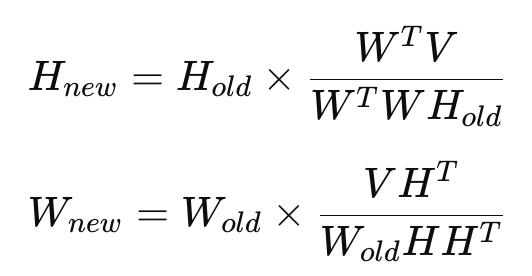

These updates gradually reduce the difference between the original TF–IDF matrix and its approximation.

```
Iteration 1:
   W₁ = W₀ × adjustment
   H₁ = H₀ × adjustment
   Error = || V - W₁H₁ ||² = 2.4  ↓

Iteration 2:
   W₂ = W₁ × adjustment
   H₂ = H₁ × adjustment
   Error = || V - W₂H₂ ||² = 1.1  ↓

Iteration 3:
   W₃ = W₂ × adjustment
   H₃ = H₂ × adjustment
   Error = || V - W₃H₃ ||² = 0.5  ↓

Converged:
   Error change < threshold → stop
```

---

### Application of Topic Modelling

| **#** | **Application**                  | **Description / Example**                                                                                                                       |
| :---: | :------------------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------- |
| **1** | **Document Clustering**          | Groups similar documents (e.g., news articles, research papers) by themes — like “finance,” “sports,” or “health.”                              |
| **2** | **Thematic Summarisation**       | Extracts dominant ideas from large text collections such as reviews, customer feedback, or survey responses.                                    |
| **3** | **Personalised Recommendations** | Suggests content (articles, videos, products) by linking users to items sharing similar underlying topics rather than just matching keywords.   |
| **4** | **Trend Analysis**               | Tracks how topics evolve over time — e.g., how interest in “renewable energy” or “AI ethics” rises or falls in news or social media.            |
| **5** | **Enhanced Search & Retrieval**  | Improves information discovery by finding conceptually related documents even when different wording is used (“AI” vs. “machine intelligence”). |


---
---

## 🧠 Applications of NLP — Summary Sheet



| **#** | **NLP Task**                                           | **Core Idea**                                                 | **How it Works (Classical Approach)**                                                                                                      | **Example / Outcome**                                                                                   |
| ----- | ------------------------------------------------------ | ------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **1** | **Predictive Text Generation (Language Modelling)**    | Predict the next word in a sentence using prior words.        | N-gram models compute conditional probabilities such as **P(wordₙ given wordₙ₋₁, wordₙ₋₂, …)**. The Markov assumption limits dependency to the last *N–1* words. | Predicting “coffee” or “tea” after “I need a cup of …”. |
| **2** | **Laplace (Add-One) Smoothing**                        | Prevent zero probability for unseen word combinations.        | Adds +1 to every possible N-gram count before computing probabilities. | Even unseen phrases like “went to the zoo” get a small non-zero probability. |
| **3** | **Sentence Probability & Perplexity**                  | Measure how natural or fluent a sentence is under a model.    | Multiply probabilities of all words to get **P(sentence)**, then compute **Perplexity = (1 / P(sentence))^(1/N)**. | “The dog sat down” has lower perplexity (more natural) than “Dog the down sat.” |
| **4** | **Template-based Sentence Generation**                 | Generate grammatically correct text using fixed patterns.     | Predefined sentence templates are filled with contextually appropriate words or phrases. | “Dear [Name], your order [#ID] has been shipped.” |
| **5** | **Rule-based Sentence Generation**                     | Use grammar rules to ensure syntactic and semantic coherence. | Apply syntactic and morphological rules for agreement and structure. | Early chatbots and report generators (e.g., ELIZA). |
| **6** | **Classical Summarisation**                            | Extract key information from long text.                       | **Frequency-based:** Select sentences with most frequent key words.<br>**Position-based:** Prefer opening/closing sentences or section headers. | News or report summarisation based on term frequency and position. |
| **7** | **Machine Translation (Rule-based)**                   | Translate using dictionaries and linguistic rules.            | **Direct:** Word-for-word substitution.<br>**Transfer-based:** Apply grammar rules for correct order. | English → French: “Hi, my name is Meet” → “Bonjour, je m’appelle Meet.” |
| **8** | **Machine Translation (Statistical)**                  | Translate by learning from bilingual corpora (data-driven).   | Combines:<br>• **Translation Model:** *P(Source given Target)*<br>• **Language Model:** *P(Target)*<br>Chooses translation that maximises joint probability. | Learns that “My name is” ↔ “Je m’appelle” via probability scores. |
